

> # Segundo Proyecto: INGENIERÍA DE FEATURES, MODELOS AVANZADOS E INTERPRETACIÓN DE MODELOS

En esta entrega se trabajara con la misma problemática desarrollada en el primer proyecto, la cual es ayudar a los tasadores/as a valuar las propiedades de la inmobiliaria, para lo cual se propone desarrollar un modelo de Machine Learning que prediga el precio de venta de un inmueble a partir de ciertas características del mismo. El set de datos a utilizar es el mismo del primer proyecto: publicaciones de inmuebles destinados a venta en el sitio web de Properati.

En primer lugar, se realizará nuevamente una exploración de datos sobre el dataset aplicando tecnicas de preprocesamiento de datos, como imputación de valores faltantes, detección y eliminación de outliers, etc. Luego se aplicarán los mismos modelos de Machine Learning del Proyecto 1 (Regresión Lineal, Árbol de decisión y Vecinos más cercanos) y se compararán los resultados obtenidos.

Poseteriormente se incorporarán dos modelos avanzados de Machine Learning: un modelo Random Forest y un modelo de regresión lineal polinómica, y se compararán sus desempeños con los modelos del punto anterior.

Por último, se exponen las conclusiones a través del análisis de los resultados obtenidos por los distintos modelos.



# 1. Introducción 

El objetivo final de este preoyecto será desarrollar un modelo que prediga el precio de venta en usd de un departamento, casa y PH minimizando el error cuade dicha predicción.

Para ello, partiremos de un conjunto de datos del mercado inmobiliario provisto por Properati y del Sprint Proyect 1 ya entregado y evaluado. Realizaremos las transformaciones de datos pertinentes, aplicaremos modelos avanzados de machine learning e interpretaremos dichos modelos.

Las variables que tenemos en nuestro set de datos responden a la siguiente información:

## A. TRANSFORMACIÓN/ANÁLISIS EXPLORATORIO DE DATOS:

**Comentarios sobre el dataset** 
`
Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.

In [ ]:
# Importamos las librerías principales para empezar a trabajar

import pandas as pd
import numpy as np
import math

#Importo paquetes de visualización
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

#Doy formato a la visualización del dataframe
pd.options.display.float_format = '{:,.1f}'.format

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DS_Proyecto_01_Datos_Properati.csv")

In [ ]:
#Observamos las primeras cinco instancias:

df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.6,-58.4,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,"153,000.0",USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.6,-58.4,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,"159,000.0",USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.6,-58.4,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,"125,000.0",USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.6,-58.4,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,"295,000.0",USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.9,-57.9,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,"40,000.0",USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [ ]:
# Observamos los tipos de variables de las que disponemos en el dataset
df.dtypes

start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
dtype: object

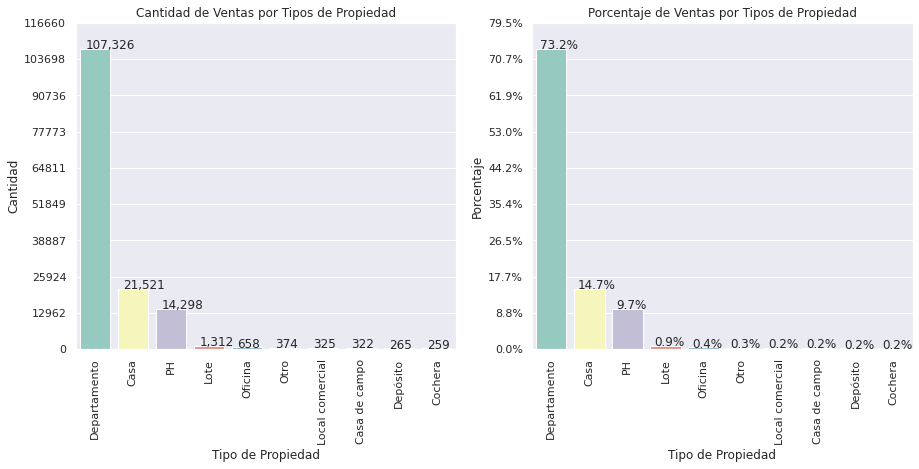

In [ ]:
plt.rc("figure", figsize=(15, 6))

# Grafico

ncount= len(df)
plt.subplot(1, 2, 1)
ax = sns.countplot(data = df, x = 'property_type', order = df['property_type'].value_counts().index, orient="v", palette ='Set3')
plt.setp(ax.get_xticklabels(), rotation=90)

plt.title('Cantidad de Ventas por Tipos de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad')


for p in ax.patches:
    ax.annotate('{:,.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
    
ax.yaxis.set_ticks(np.linspace(0, ncount-30000, 10))

# Grafico
plt.subplot(1, 2, 2)

ncount = len(df)
ax1 = sns.countplot(data = df, x = 'property_type', order = df['property_type'].value_counts().index, orient="v", palette ='Set3')
plt.setp(ax1.get_xticklabels(), rotation=90)

plt.title('Porcentaje de Ventas por Tipos de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Porcentaje')
 
for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format(100*p.get_height()/ncount), (p.get_x()+0.1, p.get_height()+5))


ax1.yaxis.set_ticks(np.linspace(0, ncount-30000, 10))

_ =ax1.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/ncount))


A partir de estos gráficos, podemos visualizar cómo 97% de nuestros datos están concentrados en los típos de propiedad de Departamento, Casa y PH. Esto es de suma importancia para el análisis exploratorio.

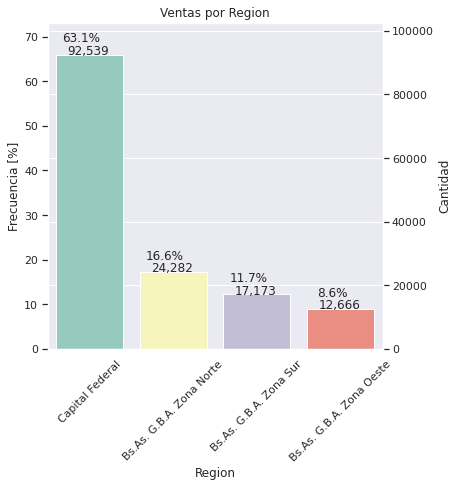

In [ ]:
ncount = len(df)

plt.figure(figsize=(6,6))

#Grafico
ax = sns.countplot(x='l2', data=df, order= df['l2'].value_counts().index, palette ='Set3')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

plt.title('Ventas por Region')
plt.xlabel('Region')
plt.ylabel('Cantidad')

# Eje gemelo
ax2=ax.twinx()

# Setar el eje del conteo a la derecha y el de la frecuencia a la izquierda
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Cambiar las etiquetas
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frecuencia [%]')

# Etiquetas frecuencia absoluta
for p in ax.patches:
    ax.annotate('{:,.0f}'.format(p.get_height()), (p.get_x()+0.135, p.get_height()))

#Etiqutas frecuencia relativa
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean()-0.1, y+3000), ha='center', va='bottom') 


# Fijar el rango de frecuencia a 0-100
ax2.set_ylim(0,(df['l2'].value_counts()[0]/ncount*100)+10)
ax.set_ylim(0,df['l2'].value_counts()[0]+10000)


# Apagar la cuadrícula en ax2 para que las líneas de cuadrícula no terminan en la parte superior de las barras
ax2.grid(None)



Además, mediante la información plasmada por el gráfico anterior, encontramos que resulta relevante estudiar las 4 regiones que admite nuestro dataset. Si bien el 63% de los datos se concentra en Capital Federal, consideramos que el resto de las regiones presentan suficientes observaciones como para no ser desestimadas.

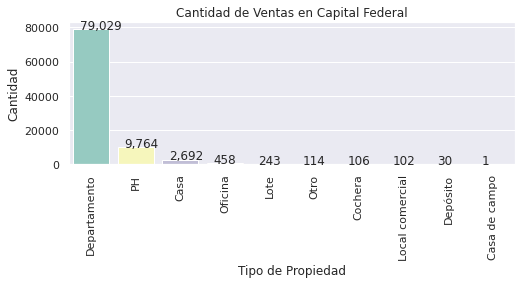

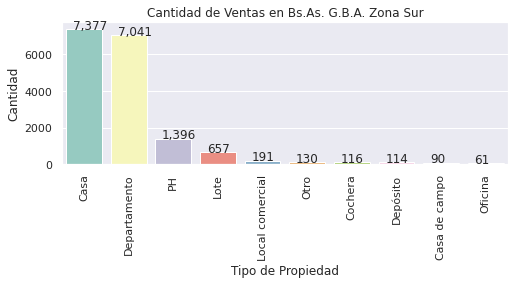

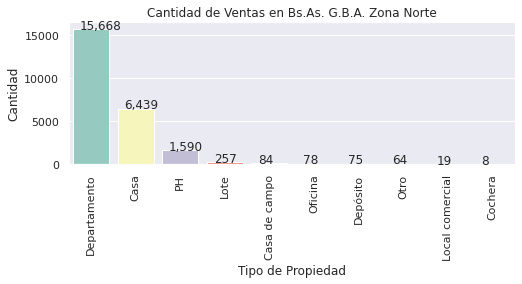

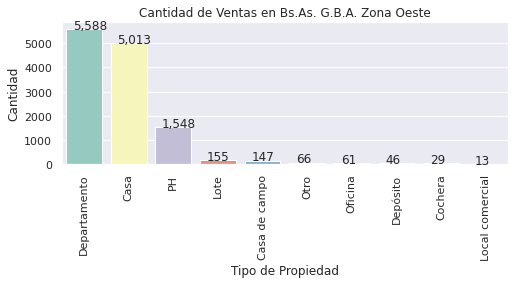

In [ ]:
# Grafico

# Capital Federal#####################################
plt.figure(figsize=(8,12))
plt.subplot(4, 1, 1)

g1 = sns.countplot(data = df[df['l2']=='Capital Federal'], x='property_type', 
                   order = df[df['l2']=='Capital Federal']['property_type'].value_counts().index, 
                   orient="v", palette ='Set3')
plt.setp(g1.get_xticklabels(), rotation=90)

plt.title('Cantidad de Ventas en Capital Federal')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad')

for p in g1.patches:
    g1.annotate('{:,.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

# Bs.As. G.B.A. Zona Sur##################################
plt.figure(figsize=(8,12))
plt.subplot(4, 1, 2)

g2 = sns.countplot(data = df[df['l2']=='Bs.As. G.B.A. Zona Sur'], 
                   order = df[df['l2']=='Bs.As. G.B.A. Zona Sur']['property_type'].value_counts().index, 
                   x='property_type', orient="v", palette ='Set3')
plt.setp(g2.get_xticklabels(), rotation=90)

plt.title('Cantidad de Ventas en Bs.As. G.B.A. Zona Sur')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad')


for p in g2.patches:
    g2.annotate('{:,.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
    
# Bs.As. G.B.A. Zona Norte###############################
plt.figure(figsize=(8,12))
plt.subplot(4, 1, 2)

g3 = sns.countplot(data = df[df['l2']=='Bs.As. G.B.A. Zona Norte'], 
                   order = df[df['l2']=='Bs.As. G.B.A. Zona Norte']['property_type'].value_counts().index,
                   x='property_type', orient="v", palette ='Set3')
plt.setp(g3.get_xticklabels(), rotation=90)

plt.title('Cantidad de Ventas en Bs.As. G.B.A. Zona Norte')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad')

for p in g3.patches:
    g3.annotate('{:,.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
    
    
# Bs.As. G.B.A. Zona Oeste##############################
plt.figure(figsize=(8,12))
plt.subplot(4, 1, 2)

g4 = sns.countplot(data = df[df['l2']=='Bs.As. G.B.A. Zona Oeste'], 
                   order = df[df['l2']=='Bs.As. G.B.A. Zona Oeste']['property_type'].value_counts().index,
                   x='property_type', orient="v", palette ='Set3')
plt.setp(g4.get_xticklabels(), rotation=90)

plt.title('Cantidad de Ventas en Bs.As. G.B.A. Zona Oeste')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad')

for p in g4.patches:
    g4.annotate('{:,.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

Por último, examinamos la cantidad de instancias por tipo de propiedad y región. Advertimos que por región, los tipos de propiedad que no corresponder a departamento, casa o PH presentan una ocurrencia desestimable pudiéndo sumar ruido al modelo.

A continuación, se procederá a hacer el filtrado correspondiente:

In [ ]:
# Nos quedamos con aquellos instancias que corresponden al modelo que queremos realizar.

data = df[(df['property_type']=='Departamento')|(df['property_type']=='Casa')|(df['property_type']=='PH')]

In [ ]:
# Reordeno las columnas para que la variable Precio quede al final, ya que es nuestro target
columns = ['l2','l3','rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'title',
           'description', 'property_type','price']
data = data[columns]

In [ ]:
# Cantidad de filas, Cantidad de columnas
print('Instancias, Columnas:', data.shape)

Instancias, Columnas: (143145, 11)


Repasamos la correlación entre las variables para detectar patrones entre ellas.

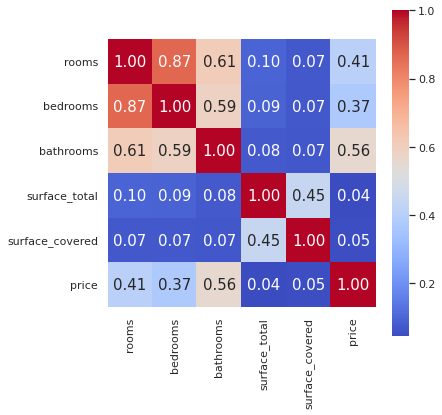

In [ ]:
# Correlación total

corr = data[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].corr().copy()
plt.figure(figsize=(6,6))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].columns, 
           yticklabels= data[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.show()

# 2. **Transformación de datos**

En este apartado se analizará la pertinencia de las siguientes transformaciones sobre el dataset:

* Detección y eliminación de outliers
* Detección y tratamiento de valores faltantes
* Encoding
* Escalado de datos
* Generación de nuevas variables predictoras / reducción de dimensionalidad (SVD/PCA)

## **2.1 Detección y eliminación de outliers**
**2.1.1 Detección de outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

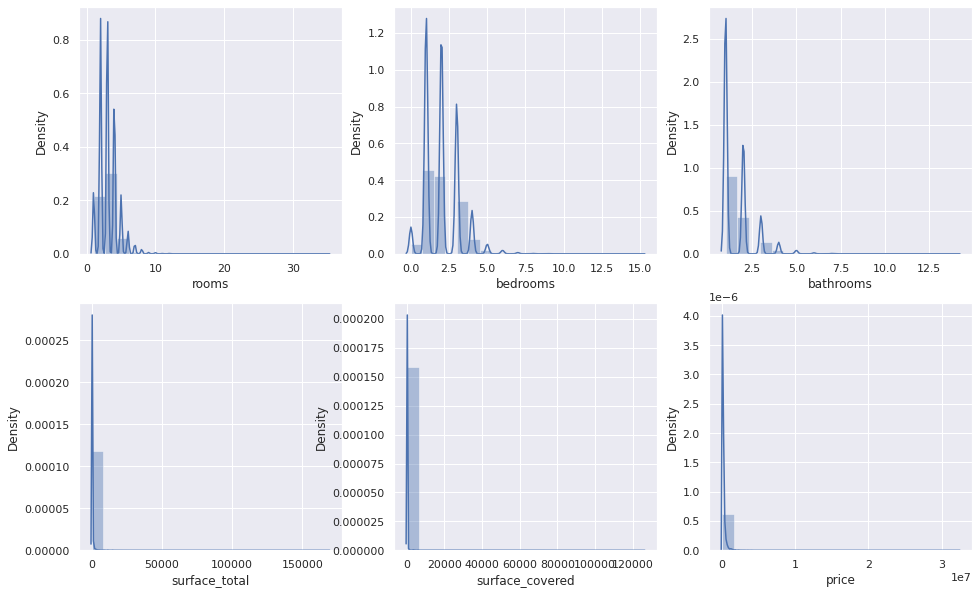

In [ ]:
# Visualizamos la distribución de las variables numéricas

plt.figure(figsize=(16,10))

plt.subplot(2, 3, 1)
sns.distplot(data['rooms'], bins = 20)

plt.subplot(2, 3, 2)
sns.distplot(data['bedrooms'], bins = 20)

plt.subplot(2, 3, 3)
sns.distplot(data['bathrooms'], bins = 20)

plt.subplot(2, 3, 4)
sns.distplot(data['surface_total'], bins = 20)

plt.subplot(2, 3, 5)
sns.distplot(data['surface_covered'], bins = 20)

plt.subplot(2, 3, 6)
sns.distplot(data['price'], bins = 20)

Para las 6 variables, se puede observar la presencia de valores outliers. Como otra forma de chequeo nos apoyaremos de los gráficos de boxplots:

In [ ]:
# Agrupo las variables:
data_rooms = data[['rooms', 'bedrooms', 'bathrooms']].copy()
data_sup = data[['surface_total', 'surface_covered']].copy()
data_price = data[['price']].copy()

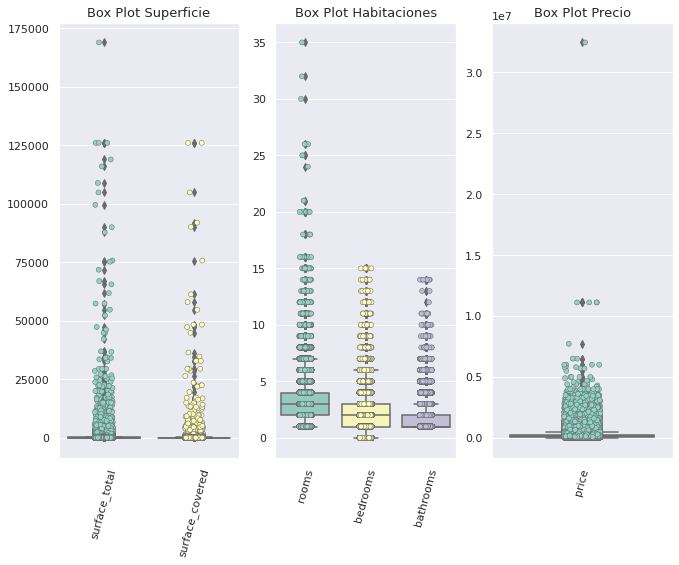

In [ ]:
plt.rc("figure", figsize=(11, 8))

# Superficie
plt.subplot(1, 3, 1)
plt.title('Box Plot Superficie', fontsize = 13)

ax1 = sns.boxplot(data=data_sup, palette='Set3')
plt.setp(ax1.get_xticklabels(), rotation=75)
ax2 = sns.stripplot(data=data_sup,jitter=True, dodge=True, linewidth=0.5, palette='Set3')

# Habitaciones
plt.subplot(1, 3, 2)
plt.title('Box Plot Habitaciones', fontsize = 13)

ax3 = sns.boxplot(data=data_rooms, palette='Set3')
plt.setp(ax3.get_xticklabels(), rotation=75)
ax4 = sns.stripplot(data=data_rooms,jitter=True, dodge=True, linewidth=0.5, palette='Set3')

# Precio
plt.subplot(1, 3, 3)
plt.title('Box Plot Precio', fontsize = 13)

ax5 = sns.boxplot(data=data_price, palette='Set3')
plt.setp(ax5.get_xticklabels(), rotation=75)
ax6 = sns.stripplot(data=data_price, jitter=True, dodge=True, linewidth=0.5, palette='Set3')


A partir de los 6 histogramas iniciales, podemos inferir que ninguna de las seis variables se distribuye normalmente. Por ello, utilizaremos el criterio del Rango Intercuartílico para descarcartar a los valores atípicos.

**Superficie cubierta**

In [ ]:
# Calculamos el rango intercuartílico
q25 = data['surface_covered'].quantile(0.25) 
q75 = data['surface_covered'].quantile(0.75)
iqr = q75 - q25
min_sc = q25 - 1.5*iqr
max_sc = q75 + 1.5*iqr

print(min_sc, max_sc)

-44.5 199.5


**Superficie total**

In [ ]:
# Calculamos el rango intercuartílico
q25 = data['surface_total'].quantile(0.25) 
q75 = data['surface_total'].quantile(0.75)
iqr = q75 - q25
min_st = q25 - 1.5*iqr
max_st = q75 + 1.5*iqr

print(min_st, max_st)

-77.0 267.0


**Precio**

In [ ]:
q25 = data['price'].quantile(0.25) 
q75 = data['price'].quantile(0.75)
iqr = q75 - q25
min_pr = q25 - 1.5*iqr
max_pr = q75 + 1.5*iqr

print(min_pr, max_pr)

-116697.5 493162.5


**Ambientes**

In [ ]:
q25 = data['rooms'].quantile(0.25) 
q75 = data['rooms'].quantile(0.75)
iqr = q75 - q25
min_rm = q25 - 1.5*iqr
max_rm = q75 + 1.5*iqr

print(min_rm, max_rm)

-1.0 7.0


**Habitaciones**

In [ ]:
q25 = data['bedrooms'].quantile(0.25) 
q75 = data['bedrooms'].quantile(0.75)
iqr = q75 - q25
min_be = q25 - 1.5*iqr
max_be = q75 + 1.5*iqr

print(min_be, max_be)

-2.0 6.0


**Baños**

In [ ]:
q25 = data['bathrooms'].quantile(0.25) 
q75 = data['bathrooms'].quantile(0.75)
iqr = q75 - q25
min_ba = q25 - 1.5*iqr
max_ba = q75 + 1.5*iqr

print(min_ba, max_ba)

-0.5 3.5


**2.1.2 Eliminación de outliers**

Nos quedaremos con aquellos valores que se encuentran comprendidos dentro de los rangos intercuartílicos encontrados más los valores missing, ya que estos los analizaremos en una etapa posterior.

In [ ]:
# Nos quedamos sólo con aquellas instancias que se encuentren comprendidas en el rango intercuartílico calculado

# Superficie Total
data = data[((data['surface_total'] > min_st) & (data['surface_total'] < max_st)) | (data['surface_total'].isnull())]
# Superficie cubierta
data = data[((data['surface_covered'] > min_sc) & (data['surface_covered'] < max_sc)) | (data['surface_covered'].isnull())]
# Ambientes
data = data[((data['rooms'] > min_rm) & (data['rooms'] < max_rm)) | (data['rooms'].isnull())]
# Habitaciones
data = data[((data['bedrooms'] > min_be) & (data['bedrooms'] < max_be)) | (data['bedrooms'].isnull())]
# Baños
data = data[((data['bathrooms'] > min_ba) & (data['bathrooms'] < max_ba)) | (data['bathrooms'].isnull())]
# Precio
data = data[((data['price'] > min_pr) & (data['price'] < max_pr)) | (data['price'].isnull())]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

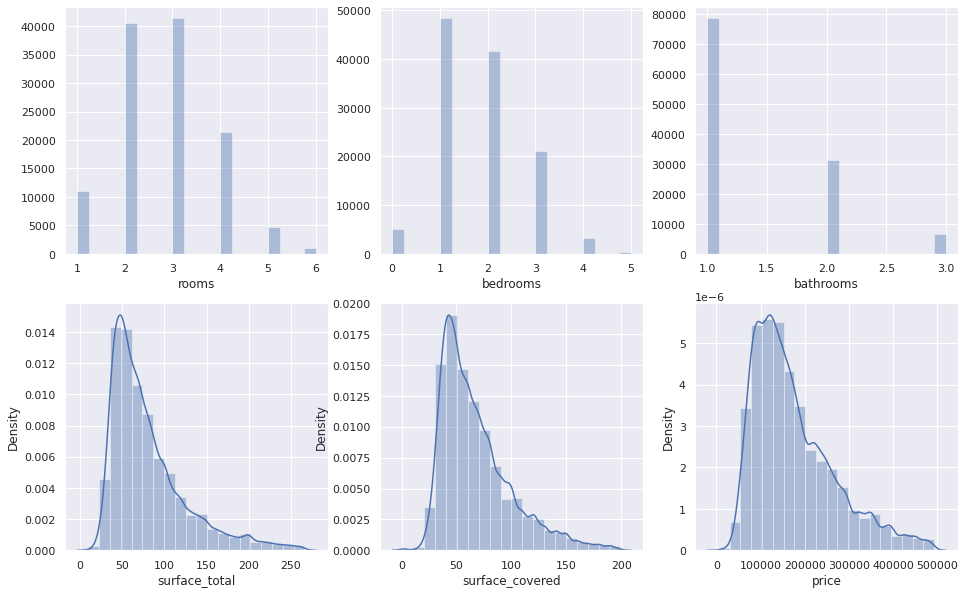

In [ ]:
# Visualizamos la distribución de las variables 

plt.figure(figsize=(16,10))

plt.subplot(2, 3, 1)
sns.distplot(data['rooms'], bins = 20, kde=False)

plt.subplot(2, 3, 2)
sns.distplot(data['bedrooms'], bins = 20, kde=False)

plt.subplot(2, 3, 3)
sns.distplot(data['bathrooms'], bins = 20, kde=False)

plt.subplot(2, 3, 4)
sns.distplot(data['surface_total'], bins = 20)

plt.subplot(2, 3, 5)
sns.distplot(data['surface_covered'], bins = 20)

plt.subplot(2, 3, 6)
sns.distplot(data['price'], bins = 20)

Finalmente, observaremos la relación por tipo de propiedad entre cada una de las variables con las demás

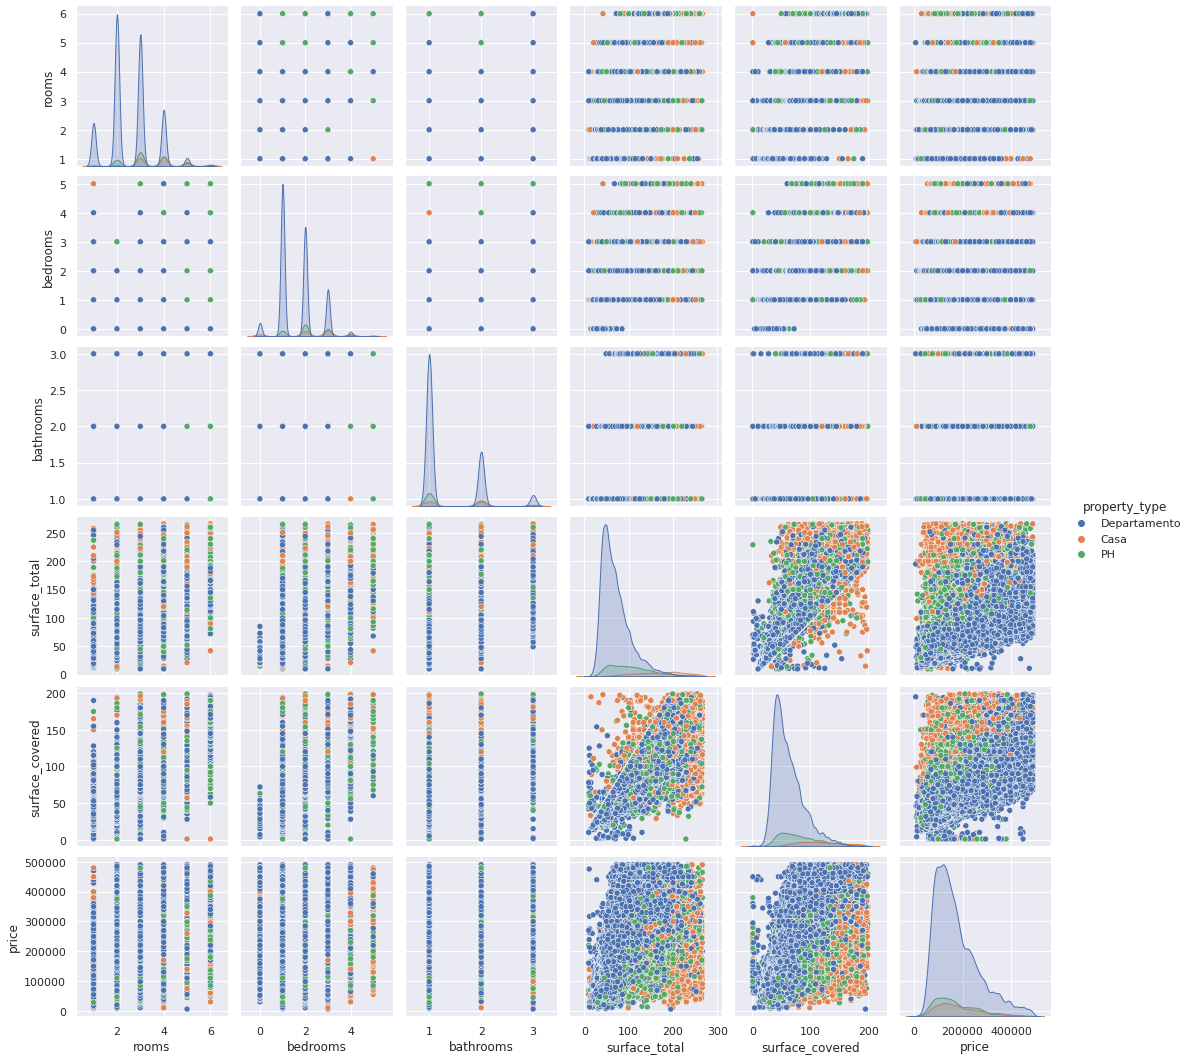

In [ ]:

sns.pairplot(data[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'property_type']],
             hue = 'property_type', hue_order=['Departamento', 'Casa', 'PH'])

## **2.2 Detección y tratamiento de las variables**

De nuestro conjunto de datos, encontramos presencia de valores missing en las variables **bathrooms, surface_total y surface_covered**.

In [ ]:
a = data[['l3','property_type', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].isnull().sum(axis=0)
b = round(a/data.shape[0]*100,2)

missing_df = pd.DataFrame({'missing_totales' : a, 'missing_freq' : b})

missing_df[missing_df['missing_totales']>0]

,missing_totales,missing_freq
bathrooms,3716,3.1
surface_total,17081,14.2
surface_covered,17348,14.4



Antes de decidir un tratamiento para estos valores faltantes, analizaremos las variables para determinar si hay un patrón en los mismos.

Los mecanismos que probaremos serán:

**MAR:** P(missing) no depende del valor faltante, pero sí de otras variables observables. En este caso, estudiamos cómo de distribuyen la cantidad de valores faltantes en relación a otra de las variables explicativas del dataset.

**MNAR:** P(missing) depende de la variable que queremos medir. Para este punto, se busca una variable fuertemenete correlacionada con la variable que queremos analizar, de forma tal de poder utilizarla como proxy y estudiar cómo se distribuyen los valores faltantes.

**MCAR:** P(missing) es la misma para todas las instancias y no depende de las medidas de la variable de interés que estemos estudiando u otras variables. Se requiere una prueba de chi-cuadrado para poder probar la independencia de la variable con valores ausentes versus las demás variables.

**Bathrooms**

Para esta variable, sólo podremos estudiar MAR y MNAR ya que no contamos con otra variable que esté fuertemente correlacionada con bathrooms para utilizar como proxy de ésta. **(Revisasr esto)**

In [ ]:
# Estudiaremos la correlación de las otras variables con la variable bathrooms
corr_matrix = data[['l3','property_type', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].corr()

corr_matrix[['bathrooms']].drop(index='bathrooms')

,bathrooms
rooms,0.5
bedrooms,0.5
surface_total,0.5
surface_covered,0.6
price,0.6


**1) MAR:** En este apartado, observaremos la distribución de los valores faltantes en función de las siguientes variables:

* Respecto a property_type

In [ ]:
bathrooms_count_mis = data['bathrooms'].isnull().groupby([data['property_type']]).sum().astype(int).reset_index(name='miss')
bathrooms_count_mis['instancias'] = data.groupby('property_type')['property_type'].count().values
bathrooms_count_mis['freq[%]'] = (bathrooms_count_mis['miss'] / bathrooms_count_mis['instancias'])*100
bathrooms_count_mis

,property_type,miss,instancias,freq[%]
0,Casa,951,9773,9.7
1,Departamento,2612,97572,2.7
2,PH,153,12749,1.2


* Respecto a l2

In [ ]:
bathrooms_count_mis = data['bathrooms'].isnull().groupby([data['l2']]).sum().astype(int).reset_index(name='miss')
bathrooms_count_mis['instancias'] = data.groupby('l2')['l2'].count().values
bathrooms_count_mis['freq[%]'] = (bathrooms_count_mis['miss'] / bathrooms_count_mis['instancias'])*100
bathrooms_count_mis

,l2,miss,instancias,freq[%]
0,Bs.As. G.B.A. Zona Norte,321,18297,1.8
1,Bs.As. G.B.A. Zona Oeste,668,9518,7.0
2,Bs.As. G.B.A. Zona Sur,694,11829,5.9
3,Capital Federal,2033,80450,2.5


* Respecto a rooms


In [ ]:
bathrooms_count_mis = data['bathrooms'].isnull().groupby([data['rooms']]).sum().astype(int).reset_index(name='miss')
bathrooms_count_mis['instancias'] = data.groupby('rooms')['rooms'].count().values
bathrooms_count_mis['freq[%]'] = (bathrooms_count_mis['miss'] / bathrooms_count_mis['instancias'])*100
bathrooms_count_mis

,rooms,miss,instancias,freq[%]
0,1.0,700,10989,6.4
1,2.0,1047,40487,2.6
2,3.0,1143,41352,2.8
3,4.0,564,21386,2.6
4,5.0,205,4784,4.3
5,6.0,57,1096,5.2


* Respeto a bedrooms


In [ ]:
bathrooms_count_mis = data['bathrooms'].isnull().groupby([data['bedrooms']]).sum().astype(int).reset_index(name='miss')
bathrooms_count_mis['instancias'] = data.groupby('bedrooms')['bedrooms'].count().values
bathrooms_count_mis['freq[%]'] = (bathrooms_count_mis['miss'] / bathrooms_count_mis['instancias'])*100
bathrooms_count_mis

,bedrooms,miss,instancias,freq[%]
0,0.0,601,5115,11.7
1,1.0,1218,48357,2.5
2,2.0,1118,41715,2.7
3,3.0,547,21213,2.6
4,4.0,179,3290,5.4
5,5.0,53,404,13.1


* Respecto a surface_total

In [ ]:
bathrooms_count_mis=data[['bathrooms', 'surface_total']].copy()

# Bienamos surface_total 
bathrooms_count_mis['surface_total_intervalos'] = pd.cut(bathrooms_count_mis['surface_total'], bins=5)

# Contamos cuantas instancias missing de surface_covered entran por los intervalos calculados
bath = bathrooms_count_mis['bathrooms'].isnull().groupby([bathrooms_count_mis['surface_total_intervalos']]).sum().astype(int).reset_index(name='count')

# Calculo la frecuencia
bath['freq[%]'] = (bath['count']/bathrooms_count_mis.groupby([bathrooms_count_mis['surface_total_intervalos']]).count()['surface_total'].values)*100
bath

,surface_total_intervalos,count,freq[%]
0,"(9.744, 61.2]",681,1.5
1,"(61.2, 112.4]",448,1.1
2,"(112.4, 163.6]",137,1.1
3,"(163.6, 214.8]",83,1.8
4,"(214.8, 266.0]",52,2.6


* Respecto a surface_covered

In [ ]:
bathrooms_count_mis=data[['bathrooms', 'surface_covered']].copy()

# Bienamos surface_total 
bathrooms_count_mis['surface_covered_intervalos'] = pd.cut(bathrooms_count_mis['surface_covered'], bins=5)

# Contamos cuantas instancias missing de surface_covered entran por los intervalos calculados
bath = bathrooms_count_mis['bathrooms'].isnull().groupby([bathrooms_count_mis['surface_covered_intervalos']]).sum().astype(int).reset_index(name='count')

# Calculo la frecuencia
bath['freq[%]'] = (bath['count']/bathrooms_count_mis.groupby([bathrooms_count_mis['surface_covered_intervalos']]).count()['surface_covered'].values)*100
bath

,surface_covered_intervalos,count,freq[%]
0,"(0.802, 40.6]",310,1.6
1,"(40.6, 80.2]",701,1.2
2,"(80.2, 119.8]",192,1.1
3,"(119.8, 159.4]",102,1.5
4,"(159.4, 199.0]",40,2.1


Luego de que hayamos contabilizado los valores missing para cada uno de los valores o intervalos posibles de las variables estudiadas, las únicas variables que podrían indicarnos un patrón son:

property_type: con un 7% de missing para el tipo de propiedad casa.
l2: con un 7% y 10% de missing para para GBA Zona Oeste y Sur respectivamente.
bedrooms: con un 15% de missing para cuando la propiedad tiene 0 dormitorios.
Para terminar de definir si tienen relación, se pasará a la siguiente etapa MCAR.

**2) MCAR** 

Para detectar un patrón MCAR, podemos utilizar pruebas estadísticas. Una prueba estadística famosa para este propósito es la prueba χ2. El χ2 podría usarse para probar la bondad de ajuste, la prueba de homogeneidad y la prueba de independencia. Este último se utilizará en este caso para averiguar si los valores faltantes en la columna "altura" depende (o no) de las otras variables (columnas).

H0: No hay asociación entre lo que entre los valores faltantes de la columna bathrooms y las otras columnas.

H1: Hay asociación entre lo que entre los valores faltantes de la columna bathrooms y las otras columnas.

El valor p crítico asociado a esta prueba es igual a 0.05.

In [ ]:
data_miss = data[['l2','l3','property_type', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
#data_miss = data_miss[data_miss['l2']=='Capital Federal']

In [ ]:
# Agregamos la columna "bathrooms_faltantes"
data_miss['bathrooms_faltantes'] = data_miss['bathrooms']
# Hacemos la columna False
data_miss['bathrooms_faltantes'] = False
# Reemplazamos por True donde hay un valor faltante en "altura"
data_miss.loc[data_miss[data_miss['bathrooms'].isnull()].index, 'bathrooms_faltantes'] = True

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [ ]:
data_miss.head()

,l2,l3,property_type,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,bathrooms_faltantes
1,Capital Federal,Boedo,PH,2.0,1.0,2.0,70.0,58.0,"159,000.0",False
2,Capital Federal,Palermo,PH,2.0,1.0,1.0,45.0,45.0,"125,000.0",False
3,Capital Federal,Palermo,PH,2.0,1.0,1.0,85.0,50.0,"295,000.0",False
4,Bs.As. G.B.A. Zona Sur,La Plata,PH,2.0,1.0,1.0,50.0,35.0,"40,000.0",False
5,Capital Federal,Villa Crespo,PH,2.0,1.0,1.0,56.0,56.0,"150,000.0",False


In [ ]:
#El primer paso es detectar si los valores faltantes de la variable 'bathrooms' está relacionado con la variable 'property_type'. .

a = data_miss[data_miss['bathrooms_faltantes']==True].groupby('property_type')['bathrooms_faltantes'].count().values.tolist()
b = data_miss[data_miss['bathrooms_faltantes']==False].groupby('property_type')['bathrooms_faltantes'].count().values.tolist()

table = [a,b]
table

[[951, 2612, 153], [8822, 94960, 12596]]

Con la librerìa scipy vamos a probar dicho test

In [ ]:

from scipy.stats import chi2_contingency

In [ ]:
chi2, p, dof, ex = chi2_contingency(table)

print("El p-value es igual a {}".format(p))

El p-value es igual a 0.0


Dado que el valor p es menor que 5%, rechazamos la hipótesis nula (H0) y concluimos que los valores missing de la variable bathrooms no son independientes de la variable property_type.

Observación: Puede llamar la atención que el p valor nos de exactamente cero. Para poder asumir que cuando nos esta escenario es porque aproxima a dicho número, realizamos la prueba estadística "manualmente" (se adjunta) y obtuvimos las mismas conclusiones. Es por ello que de aquí en adelante, se entenderá que un *p-value = 0.0* es correcto y no presenta error de cálculo o de aplicación de la librería.

* Respecto a l-2

In [ ]:
#El primer paso es detectar si los valores faltantes de la variable 'bathrooms' está relacionado con la variable 'property_type'. .

a = data_miss[data_miss['bathrooms_faltantes']==True].groupby('l2')['bathrooms_faltantes'].count().values.tolist()
b = data_miss[data_miss['bathrooms_faltantes']==False].groupby('l2')['bathrooms_faltantes'].count().values.tolist()

table = [a,b]
table

[[321, 668, 694, 2033], [17976, 8850, 11135, 78417]]

In [ ]:
chi2, p, dof, ex = chi2_contingency(table)
print("El p-value es igual a {}".format(p))

El p-value es igual a 7.506024857005732e-214


Dado que el valor p es mayor que 5%, no rechazamos la hipótesis nula (H0) y concluimos que los valores missing de la variable bathrooms son independientes de la variable l2.

* Respecto a rooms

In [ ]:
#El primer paso es detectar si los valores faltantes de la variable 'bathrooms' está relacionado con la variable 'property_type'. .

a= data_miss[data_miss['bathrooms_faltantes']==True].groupby('rooms')['bathrooms_faltantes'].count().values.tolist()

b= data_miss[data_miss['bathrooms_faltantes']==False].groupby('rooms')['bathrooms_faltantes'].count().values.tolist()

table = [a,b]
table

[[700, 1047, 1143, 564, 205, 57], [10289, 39440, 40209, 20822, 4579, 1039]]

In [ ]:
chi2, p, dof, ex = chi2_contingency(table)
print("El p-value es igual a {}".format(p))

El p-value es igual a 3.707351378106005e-105



Dado que el valor p es mayor que 5%, no rechazamos la hipótesis nula (H0) y concluimos que los valores missing de la variable bathrooms son independientes de la variable rooms.

* Respecto a bedrooms

In [ ]:
#El primer paso es detectar si los valores faltantes de la variable 'bathrooms' está relacionado con la variable 'property_type'. .

a=data_miss[data_miss['bathrooms_faltantes']==True].groupby('bedrooms')['bathrooms_faltantes'].count().values.tolist()

b=data_miss[data_miss['bathrooms_faltantes']==False].groupby('bedrooms')['bathrooms_faltantes'].count().values.tolist()

table = [a,b]
table

[[601, 1218, 1118, 547, 179, 53], [4514, 47139, 40597, 20666, 3111, 351]]

In [ ]:

chi2, p, dof, ex = chi2_contingency(table)
print("El p-value es igual a {}".format(p))


El p-value es igual a 0.0


Dado que el valor p es menor que 5%, rechazamos la hipótesis nula (H0) y concluimos que los valores missing de la variable bathrooms no son independientes de la variable bedrooms.

* Respecto a surface_total

In [ ]:
data_miss=data[['bathrooms', 'surface_total']].copy()

# Binenamos surface_total 
data_miss['surface_total_intervalos'] = pd.cut(data_miss['surface_total'], bins=5)

In [ ]:
# Agregamos la columna "bathrooms_faltantes"
data_miss['bathrooms_faltantes'] = data_miss['bathrooms']
# Hacemos la columna False
data_miss['bathrooms_faltantes'] = False
# Reemplazamos por True donde hay un valor faltante en "altura"
data_miss.loc[data_miss[data_miss['bathrooms'].isnull()].index, 'bathrooms_faltantes'] = True

In [ ]:
#El primer paso es detectar si los valores faltantes de la variable 'bathrooms' está relacionado con la variable 'property_type'. .

a=data_miss[data_miss['bathrooms_faltantes']==True].groupby('surface_total_intervalos')['bathrooms_faltantes'].count().values.tolist()
b= data_miss[data_miss['bathrooms_faltantes']==False].groupby('surface_total_intervalos')['bathrooms_faltantes'].count().values.tolist()

table = [a,b]
table

[[681, 448, 137, 83, 52], [43414, 39426, 12190, 4620, 1962]]

In [ ]:
chi2, p, dof, ex = chi2_contingency(table)
print("El p-value es igual a {}".format(p))



El p-value es igual a 1.31415978981152e-12


Dado que el valor p es mayor que 5%, no rechazamos la hipótesis nula (H0) y concluimos que los valores missing de la variable bathrooms son independientes de la variable surface_total.

* Respecto a surface_covered

In [ ]:
data_miss=data[['bathrooms', 'surface_covered']].copy()

# Binenamos surface_total 
data_miss['surface_covered_intervalos'] = pd.cut(data_miss['surface_covered'], bins=5)

In [ ]:
# Agregamos la columna "bathrooms_faltantes"
data_miss['bathrooms_faltantes'] = data_miss['bathrooms']
# Hacemos la columna False
data_miss['bathrooms_faltantes'] = False
# Reemplazamos por True donde hay un valor faltante en "altura"
data_miss.loc[data_miss[data_miss['bathrooms'].isnull()].index, 'bathrooms_faltantes'] = True

In [ ]:
data_miss.head()


,bathrooms,surface_covered,surface_covered_intervalos,bathrooms_faltantes
1,2.0,58.0,"(40.6, 80.2]",False
2,1.0,45.0,"(40.6, 80.2]",False
3,1.0,50.0,"(40.6, 80.2]",False
4,1.0,35.0,"(0.802, 40.6]",False
5,1.0,56.0,"(40.6, 80.2]",False


In [ ]:
#El primer paso es detectar si los valores faltantes de la variable 'bathrooms' está relacionado con la variable 'property_type'. .

a = data_miss[data_miss['bathrooms_faltantes']==True].groupby('surface_covered_intervalos')['bathrooms_faltantes'].count().values.tolist()

b = data_miss[data_miss['bathrooms_faltantes']==False].groupby('surface_covered_intervalos')['bathrooms_faltantes'].count().values.tolist()

table = [a,b]
table

[[310, 701, 192, 102, 40], [18899, 55828, 18068, 6727, 1879]]

In [ ]:
chi2, p, dof, ex = chi2_contingency(table)
print("El p-value es igual a {}".format(p))

El p-value es igual a 2.892085491080565e-07


Dado que el valor p es mayor que 5%, no rechazamos la hipótesis nula (H0) y concluimos que los valores missing de la variable bathrooms son independientes de la variable surface_covered.

**Superficie total y cubierta**

Las variables surface_covered y surface_total están muy correlacionadas y ambas con valores faltantes. Por ello, las analizaremos conjuntamente.

In [ ]:

corr_matrix = data[['l3','property_type', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].corr()

corr_matrix[['surface_total']].drop(index='surface_total')

,surface_total
rooms,0.7
bedrooms,0.7
bathrooms,0.5
surface_covered,0.9
price,0.5


In [ ]:
corr_matrix[['surface_covered']].drop(index='surface_covered')


,surface_covered
rooms,0.8
bedrooms,0.8
bathrooms,0.6
surface_total,0.9
price,0.6


**1) MAR:** En este apartado, observaremos la distribución de los valoes missing en función de las siguientes variables:

* Respecto a property_type

In [ ]:
surface_total_count_mis = data['surface_total'].isnull().groupby([data['property_type']]).sum().astype(int).reset_index(name='miss')
surface_total_count_mis['instancias'] = data.groupby('property_type')['property_type'].count().values
surface_total_count_mis['freq[%]'] = (surface_total_count_mis['miss'] / surface_total_count_mis['instancias'])*100
surface_total_count_mis

,property_type,miss,instancias,freq[%]
0,Casa,4041,9773,41.3
1,Departamento,12921,97572,13.2
2,PH,119,12749,0.9


In [ ]:
surface_covered_count_mis = data['surface_covered'].isnull().groupby([data['property_type']]).sum().astype(int).reset_index(name='miss')
surface_covered_count_mis['instancias'] = data.groupby('property_type')['property_type'].count().values
surface_covered_count_mis['freq[%]'] = (surface_covered_count_mis['miss'] / surface_covered_count_mis['instancias'])*100
surface_covered_count_mis

,property_type,miss,instancias,freq[%]
0,Casa,3997,9773,40.9
1,Departamento,13207,97572,13.5
2,PH,144,12749,1.1


Respecto a rooms

In [ ]:
surface_total_count_mis = data['surface_total'].isnull().groupby([data['rooms']]).sum().astype(int).reset_index(name='miss')
surface_total_count_mis['instancias'] = data.groupby('rooms')['rooms'].count().values
surface_total_count_mis['freq[%]'] = (surface_total_count_mis['miss'] / surface_total_count_mis['instancias'])*100
surface_total_count_mis

,rooms,miss,instancias,freq[%]
0,1.0,2861,10989,26.0
1,2.0,4946,40487,12.2
2,3.0,5205,41352,12.6
3,4.0,2931,21386,13.7
4,5.0,883,4784,18.5
5,6.0,255,1096,23.3


In [ ]:
surface_covered_count_mis = data['surface_covered'].isnull().groupby([data['rooms']]).sum().astype(int).reset_index(name='miss')
surface_covered_count_mis['instancias'] = data.groupby('rooms')['rooms'].count().values
surface_covered_count_mis['freq[%]'] = (surface_covered_count_mis['miss'] / surface_covered_count_mis['instancias'])*100
surface_covered_count_mis

,rooms,miss,instancias,freq[%]
0,1.0,2906,10989,26.4
1,2.0,5030,40487,12.4
2,3.0,5306,41352,12.8
3,4.0,2981,21386,13.9
4,5.0,871,4784,18.2
5,6.0,254,1096,23.2


* Respecto a bedrooms 

In [ ]:
surface_total_count_mis = data['surface_total'].isnull().groupby([data['bedrooms']]).sum().astype(int).reset_index(name='miss')
surface_total_count_mis['instancias'] = data.groupby('bedrooms')['bedrooms'].count().values
surface_total_count_mis['freq[%]'] = (surface_total_count_mis['miss'] / surface_total_count_mis['instancias'])*100
surface_total_count_mis

,bedrooms,miss,instancias,freq[%]
0,0.0,4492,5115,87.8
1,1.0,4911,48357,10.2
2,2.0,4401,41715,10.6
3,3.0,2487,21213,11.7
4,4.0,635,3290,19.3
5,5.0,155,404,38.4


In [ ]:
surface_covered_count_mis = data['surface_covered'].isnull().groupby([data['bedrooms']]).sum().astype(int).reset_index(name='miss')
surface_covered_count_mis['instancias'] = data.groupby('bedrooms')['bedrooms'].count().values
surface_covered_count_mis['freq[%]'] = (surface_covered_count_mis['miss'] / surface_covered_count_mis['instancias'])*100
surface_covered_count_mis

,bedrooms,miss,instancias,freq[%]
0,0.0,4514,5115,88.3
1,1.0,5023,48357,10.4
2,2.0,4493,41715,10.8
3,3.0,2529,21213,11.9
4,4.0,633,3290,19.2
5,5.0,156,404,38.6


Dado que el valor p es menor que 5%, rechazamos la hipótesis nula (H0) y concluimos que los valores missing de la variable surface_total no son independientes de la variable surface_covered. Por lo tanto, los valores missing de surface_total guardan dependencia con los de surface_covered pero no sucede así a la inversa.

**2.2.2 Conclusiones del análisis**

Del relevamiento realizado en el apartado anterior, podemos concluir que en ningún caso, los valores faltantes son completamente aleatorios:

* Valores missing de bathrooms: Se encontró una relación de dependencia con la variable property_type y bedrooms.
* Valores missing de surface_covered: Se encontró una relación de dependencia con las variables property_type, l2, rooms y bedrooms.
* Valores missing de surface_total: Se encontró una relación de dependencia con las variables property_type, l2, rooms, bedrooms y surface_covered.

**2.2.3 Tratamiento de los valores faltantes**

Las estrategias posibles para tratar a los valores faltantes son los siguientes:

* Eliminar las instancias 
* Eliminar las variables 
* Imputar las instancias

Si bien el pocentaje de valores faltantes respecto del total de instancias de nuestro set de datos no muy fuerte, el camino a seguir va a ser una imputación de los missing values. 

In [ ]:
# Creamos una variable dummy para indicar si la instancia posee una imputación de valor nulo o no
data['imput_indicator'] = np.where((data['bathrooms'].isnull())|(data['surface_total'].isnull())|
                                  (data['surface_covered'].isnull()), 0, 1)

**Imputación valores faltantes de bathrooms:**

En función de las conclusiones obtenidas en el punto anterior, se procederá a imputar con la cantidad de baños media por tipo de propiedad y cantidad de dormitorios.

In [ ]:
data_imputa = data.copy()

In [ ]:
# Creo la variable 'codigo', que es una concatenación de 'property_type' y 'bedrooms'
data_imputa['codigo_bath']=[(str(data_imputa['property_type'][i])+"-"+str(data_imputa['bedrooms'][i])) 
                            for i in data_imputa.index]

In [ ]:
# Se imputa por 'rooms' y 'bedrooms'
data_imputa['bathrooms']=[data_imputa['bathrooms'][i] if math.isnan(data_imputa['bathrooms'][i])==False 
                         else data_imputa[data_imputa['codigo_bath']==data_imputa['codigo_bath'][i]]['bathrooms'].median()
                        for i in data_imputa.index]

In [ ]:
# Evalúo si quedan missing en la variable 'bathrooms'

data_imputa['bathrooms'].isnull().value_counts()

False    120094
Name: bathrooms, dtype: int64

**Imputación valores faltantes de surface_covered:**

Antes de realizar la imputación, nos aseguraremos que los datos sean consistentes. Por ello, para los casos en que la superficie total sea mayor que la superficie cubierta, se reemplazará por el de la superficie cubierta asumiento que fue un error a la hora de cargar los datos.

In [ ]:
# % de instancias que cumplen este caso:
data[data['surface_total']<data['surface_covered']].value_counts().sum()/len(data)*100

0.7594051326460939

In [ ]:
data_imputa['surface_total']=[data_imputa['surface_total'][i] if 
                              (data_imputa['surface_total'][i] > data_imputa['surface_covered'][i])==True 
                              else data_imputa['surface_covered'][i] for i in data_imputa.index]

In [ ]:
data_imputa[data_imputa['surface_total']<data_imputa['surface_covered']].value_counts().sum()

0


Ahora, en función de las conclusiones obtenidas en el punto anterior se procederá a imputar en el siguiente orden:

* Si surface_total no está ausente, se imputará con el valor de dicha variable menos la diferencia media entre surface_covered y surface_total en relación a las variables property_type, l2, rooms y bedrooms.
* Si surface_total está ausente, se imputará con la media de surface_covered en relación a las variables property_type, l2, rooms y bedrooms

In [ ]:
# Creo la variable 'codigo', que es una concatenación de 'property_type', 'l2', 'rooms' y 'bedrooms'
data_imputa['codigo_sup']=[(str(data_imputa['property_type'][i])+"-"+str(data_imputa['l2'][i])+"-"+
                           str(data_imputa['rooms'][i])+"-"+str(data_imputa['bedrooms'][i])) for i in data_imputa.index]

In [ ]:
# Obtengo la diferencia entre 'surface_total' y 'surface_covered'
data_imputa['dif_sup']=data_imputa['surface_total'] - data_imputa['surface_covered']

In [ ]:
# Obtengo la diferencia media entre 'surface_total' y 'surface_covered' por cantidad de ambientes y dormitorios
median_dif = data_imputa.groupby(['codigo_sup'], as_index=False)['dif_sup'].median().rename(columns = {'dif_sup': 'dif_sup_media'}, inplace = False)

# Agrego la variable 
data_imputa = data_imputa.merge(median_dif, how='left', on=['codigo_sup'])
data_imputa.head(2)

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,title,description,property_type,price,imput_indicator,codigo_bath,codigo_sup,dif_sup,dif_sup_media
0,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,"159,000.0",1,PH-1.0,PH-Capital Federal-2.0-1.0,12.0,3.0
1,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,"125,000.0",1,PH-1.0,PH-Capital Federal-2.0-1.0,0.0,3.0


In [ ]:
# Obtengo la 'surface_total_imputar'
data_imputa['surface_cubierta_imputar'] = data_imputa['surface_total'] - data_imputa['dif_sup_media']

In [ ]:
# Se imputa por 'surface_total_imputar'
data_imputa['surface_covered']=[data_imputa['surface_covered'][i] if math.isnan(data_imputa['surface_covered'][i])==False 
                         else data_imputa['surface_cubierta_imputar'][i] for i in data_imputa.index]

In [ ]:

# Evalúo si quedan missing en la variable 'surface_total'
data_imputa['surface_covered'].isnull().value_counts()

False    102746
True      17348
Name: surface_covered, dtype: int64

In [ ]:
# Se imputa por 'property_type', 'l2', 'rooms' y 'bedrooms'
data_imputa['surface_covered']=[data_imputa['surface_covered'][i] if math.isnan(data_imputa['surface_covered'][i])==False 
                              else data_imputa[data_imputa['codigo_sup']==data_imputa['codigo_sup'][i]]['surface_covered'].median()
                              for i in data_imputa.index]


In [ ]:
# Evalúo si quedan missing en la variable 'surface_total'
data_imputa['surface_covered'].isnull().value_counts()

False    117823
True       2271
Name: surface_covered, dtype: int64

In [ ]:
# Creo la variable 'codigo', que es una concatenación de 'property_type', 'l2', 'rooms'
data_imputa['codigo_sup_2']=[(str(data_imputa['property_type'][i])+"-"+str(data_imputa['l2'][i])+"-"+
                           str(data_imputa['rooms'][i])) for i in data_imputa.index]

In [ ]:
# Se imputa por 'property_type', 'l2', 'rooms' y 'bedrooms'
data_imputa['surface_covered']=[data_imputa['surface_covered'][i] if math.isnan(data_imputa['surface_covered'][i])==False 
                              else data_imputa[data_imputa['codigo_sup_2']==data_imputa['codigo_sup_2'][i]]['surface_covered'].median()
                              for i in data_imputa.index]

In [ ]:
# Evalúo si quedan missing en la variable 'surface_total'
data_imputa['surface_covered'].isnull().value_counts()

False    120094
Name: surface_covered, dtype: int64

**Imputación valores faltantes de surface_total:**

Se imputará con el valor de surface_covered más la diferencia media entre surface_covered y surface_total en relación a las variables property_type, l2, rooms y bedrooms.

In [ ]:
# Obtenemos 'surface_covered_imputar'
data_imputa['dif_sup_media'] = data_imputa['dif_sup_media'].fillna(0)
data_imputa['surface_total_imputar'] = data_imputa['surface_covered'] + data_imputa['dif_sup_media']

In [ ]:
# Se imputa por 'surface_covered_imputar'
data_imputa['surface_total']=[data_imputa['surface_total'][i] if math.isnan(data_imputa['surface_total'][i])==False 
                                else data_imputa['surface_total_imputar'][i] for i in data_imputa.index]


In [ ]:
# Evalúo si quedan missing en la variable 'surface_total'
data_imputa['surface_total'].isnull().value_counts()

False    120094
Name: surface_total, dtype: int64

In [ ]:
data_imputa.columns

Index(['l2', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'title', 'description', 'property_type', 'price',
       'imput_indicator', 'codigo_bath', 'codigo_sup', 'dif_sup',
       'dif_sup_media', 'surface_cubierta_imputar', 'codigo_sup_2',
       'surface_total_imputar'],
      dtype='object')

In [ ]:
data = data_imputa[['l2','l3','rooms','bedrooms','bathrooms','surface_total','surface_covered','title','description',
                    'property_type','imput_indicator','price',]].copy()


**2.3 Encoding** 


En esta sección se analizará la pertinencia de agregar atributos categóricos a nuestro set de variables predictoras para utilizar posteriormente en el modelo.

Las variables categóricas con las que contamos son:

l2

l3

property_type

title - description

Tipos de encoding que se considerarán es este trabajo:

Label Encoding: codifica las etiquetas con un valor entre 0 y n_classes-1
One-Hot Encoding: crea una variable dummy por cada posible valor de la variable categórica.
Frequency Encoding: utiliza la frecuencia de las categorías como etiquetas.
Target or Impact or Likelihood Encoding: en este caso, las etiquetas se correlacionan directamente con la variable target, por ejemplo, asignando el valor medio de la variable target en los datos de entrenamiento que toma en cada categoría


**l2: Region**

Para esta variable se descartará la opción de Label Encoding ya que no presenta una relación de orden entre sus etiquetas. Se probarán One-Hot Encoding ya que sólo contamos con 4 tipos de regiones diferentes y no acrecentará sustancialmente la dimensionalidad de nuestro dataset. También se probará con Frequency Encoding y más adelante se decidirá cuál opción performa mejor.

In [ ]:
# One-Hot Encoding
dum_l2 = pd.get_dummies(data['l2'], drop_first=True)

data = pd.concat([data, dum_l2], axis=1)

In [ ]:
# Frequency Encoding

l2_freq = data.copy()
l2_freq['contador'] = 1
l2_freq = l2_freq.groupby(['l2'], as_index=False)['contador'].sum().rename(columns = {'contador': 'l2_freq'}, inplace = False)
l2_freq.head()

,l2,l2_freq
0,Bs.As. G.B.A. Zona Norte,18297
1,Bs.As. G.B.A. Zona Oeste,9518
2,Bs.As. G.B.A. Zona Sur,11829
3,Capital Federal,80450


In [ ]:
data = data.merge(l2_freq, how='left', on=['l2'])
data.head(2)

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,title,description,property_type,imput_indicator,price,Bs.As. G.B.A. Zona Oeste,Bs.As. G.B.A. Zona Sur,Capital Federal,l2_freq
0,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,1,"159,000.0",0,0,1,80450
1,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,1,"125,000.0",0,0,1,80450


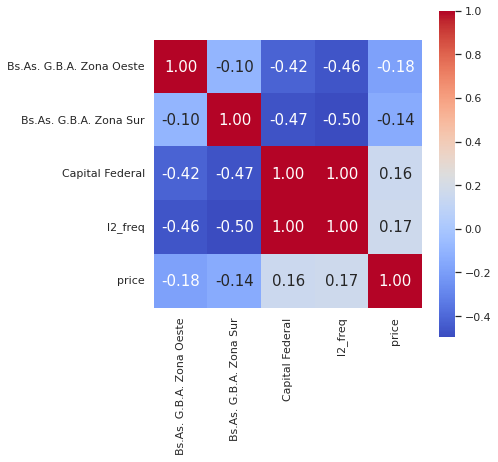

In [ ]:
corr = data[['Bs.As. G.B.A. Zona Oeste', 'Bs.As. G.B.A. Zona Sur','Capital Federal', 'l2_freq', 'price']].corr().copy()
plt.figure(figsize=(6,6))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data[['Bs.As. G.B.A. Zona Oeste', 'Bs.As. G.B.A. Zona Sur','Capital Federal', 'l2_freq', 'price']].columns, 
           yticklabels= data[['Bs.As. G.B.A. Zona Oeste', 'Bs.As. G.B.A. Zona Sur','Capital Federal', 'l2_freq', 'price']].columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.show()



**l3: Barrio**

Para esta variable se descartarán las opciones de Label Encoding ya que no presenta una relación de orden entre sus etiquetas y One-Hot Encoding debido a que la cantidad de valores posibles que puede tomar la variable incrementará fuertemente la dimensionalidad.

Por otro lado, se probará Frequency Encoding y Target Encoding por los motivos que daremos a continuación:

* Frequency Encoding: Teniendo en cuenta que no tenemos una cantidad de muestras homogénea por barrio, este enconing puede llegar a enseñarle al algoritmo la ponderación que tiene cada observación.
* Target Encoding: Bajo conocimientos del mercado inmobiliario, sabemos que un tasador asignará el precio de un inmueble no sólo por las carácterísticas del mismo sino también por el barrio en el que se encuentra. Esto nos permite suponer que hay un precio medio por el que rondará la propiedad independientemente de todos los atributos que el mismo posea.

In [ ]:
# Cantidad de valores posibles que puede tomar la variable:
data['l3'].nunique()

89

In [ ]:
# Frequency Encoding

l3_freq = data.copy()
l3_freq['contador'] = 1
l3_freq = l3_freq.groupby(['l3'], as_index=False)['contador'].sum().rename(columns = {'contador': 'l3_freq'}, inplace = False)
l3_freq.head()

,l3,l3_freq
0,Abasto,457
1,Agronomía,152
2,Almagro,7210
3,Almirante Brown,743
4,Avellaneda,1200


In [ ]:
# Target Encoding
l3_median_price = data.groupby(['l3'], as_index=False)['price'].median().rename(columns = {'price': 'l3_median_price'}, inplace = False)
l3_median_price.head()

,l3,l3_median_price
0,Abasto,"159,000.0"
1,Agronomía,"139,000.0"
2,Almagro,"165,000.0"
3,Almirante Brown,"175,000.0"
4,Avellaneda,"95,000.0"


In [ ]:
# Agrego ambas variables 
data = data.merge(l3_freq, how='left', on=['l3'])
data = data.merge(l3_median_price, how='left', on=['l3'])
data.head(2)

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,title,description,property_type,imput_indicator,price,Bs.As. G.B.A. Zona Oeste,Bs.As. G.B.A. Zona Sur,Capital Federal,l2_freq,l3_freq,l3_median_price
0,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,1,"159,000.0",0,0,1,80450,862,"120,500.0"
1,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,1,"125,000.0",0,0,1,80450,10850,"199,000.0"


In [ ]:
data.columns

Index(['l2', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'title', 'description', 'property_type',
       'imput_indicator', 'price', 'Bs.As. G.B.A. Zona Oeste',
       'Bs.As. G.B.A. Zona Sur', 'Capital Federal', 'l2_freq', 'l3_freq',
       'l3_median_price'],
      dtype='object')

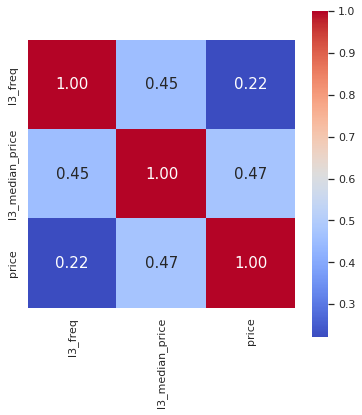

In [ ]:
corr = data[['l3_freq', 'l3_median_price', 'price']].corr().copy()
plt.figure(figsize=(6,6))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data[['l3_freq', 'l3_median_price', 'price']].columns, 
           yticklabels= data[['l3_freq', 'l3_median_price', 'price']].columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.show()

**property_type: Tipo de Propiedad**

Para esta variable se probarán One-Hot Encoding ya que sólo trabajaremos con 3 tipos de propiedades diferentes y no acrecentará sustancialmente la dimensionalidad de nuestro dataset. Sin embargo, dado que en el Sprint Proyect 1 se probó esta opción y no se vieron mejoras en la performance del modelo, también se probará con Frequency Encoding.

In [ ]:
# One-Hot Encoding
dum_pt = pd.get_dummies(data['property_type'], drop_first=True)

data = pd.concat([data, dum_pt], axis=1)

In [ ]:
# Frequency Encoding

pt_freq = data.copy()
pt_freq['contador'] = 1
pt_freq = pt_freq.groupby(['property_type'], as_index=False)['contador'].sum().rename(columns = {'contador': 'pt_freq'}, inplace = False)
pt_freq.head()

,property_type,pt_freq
0,Casa,9773
1,Departamento,97572
2,PH,12749


In [ ]:
data = data.merge(pt_freq, how='left', on=['property_type'])
data.head(2)

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,title,description,property_type,imput_indicator,price,Bs.As. G.B.A. Zona Oeste,Bs.As. G.B.A. Zona Sur,Capital Federal,l2_freq,l3_freq,l3_median_price,Departamento,PH,pt_freq
0,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,1,"159,000.0",0,0,1,80450,862,"120,500.0",0,1,12749
1,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,1,"125,000.0",0,0,1,80450,10850,"199,000.0",0,1,12749


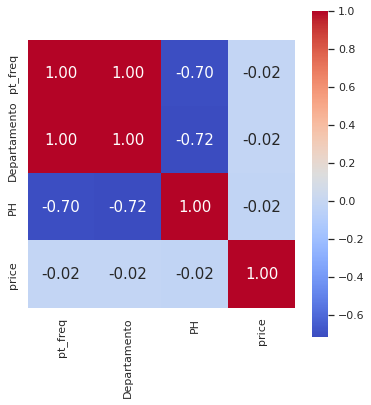

In [ ]:
corr = data[['pt_freq','Departamento', 'PH', 'price']].corr().copy()
plt.figure(figsize=(6,6))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data[['pt_freq','Departamento', 'PH',  'price']].columns, 
           yticklabels= data[['pt_freq','Departamento', 'PH',  'price']].columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.show()


**title y description: Título y Descripción**

Excepto por las instancias que se encuentran re-publicadas en el periodo de tiempo que consideramos, las variables título y descripción toman tantos valores como inmuebles distintos. Por tal motivo, no podemos hacer un proceso de enconding en los términos que se planteó en este punto.

Sin embargo, con conocimiento del mercado inmobiliario, podemos capturar partes de la información que contiene que estas variables contienen, buscando características que sabemos que influyen en el precio de un inmueble. Más adelante, haremos un análisis sobre la relevancia de las variables construidas y nos quedaremos con aquellas que hagan sentido para el modelo.

In [ ]:
data['amenities'] = np.where(data['description'].str.contains('amenities', case=False), 1, 0).copy()

In [ ]:
data['pileta'] = np.where(data['description'].str.contains('pileta', case=False), 1, 0).copy()

In [ ]:
data['kitchenette'] = np.where(data['description'].str.contains('kitchenette', case=False), 1, 0).copy()

In [ ]:
data['estrenar'] = np.where(data['description'].str.contains('estrenar', case=False), 1, 0).copy()

In [ ]:
data['terraza'] = np.where(data['description'].str.contains('terraza', case=False), 1, 0).copy()

In [ ]:
data['balcon'] = np.where(data['description'].str.contains('balcon', case=False), 1, 0).copy()

In [ ]:
data['patio'] = np.where(data['description'].str.contains('patio', case=False), 1, 0).copy()

In [ ]:
data['transporte'] = np.where(data['description'].str.contains('subte', case=False)|
                              data['description'].str.contains('tren', case=False)|
                              data['description'].str.contains('trensporte', case=False), 1, 0).copy()

In [ ]:
data['cochera'] = np.where(data['description'].str.contains('cochera', case=False), 1, 0).copy()

In [ ]:
data['sol'] = np.where(data['description'].str.contains('sol', case=False)|
                       data['description'].str.contains('luminoso', case=False)|
                       data['description'].str.contains('soleado', case=False)|
                       data['description'].str.contains('luz', case=False), 1, 0).copy()

In [ ]:
data['pozo'] = np.where(data['description'].str.contains('pozo', case=False), 1, 0).copy()

In [ ]:
data['estrenar'] = np.where(data['description'].str.contains('estrenar', case=False), 1, 0).copy()

In [ ]:
data['facultad'] = np.where(data['description'].str.contains('facultad', case=False) | 
                            data['description'].str.contains('facultades', case=False)|
                            data['description'].str.contains('universidad', case=False)|
                            data['description'].str.contains('universidades', case=False), 1, 0).copy()

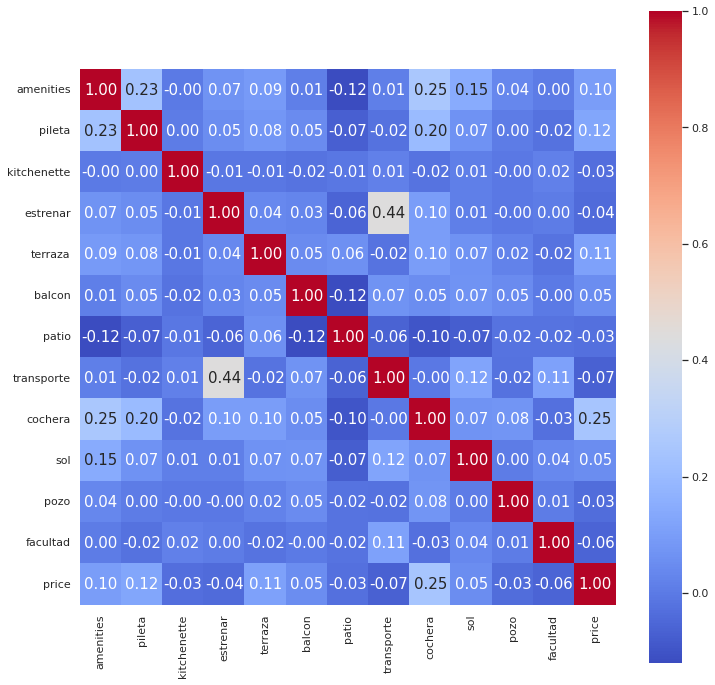

In [ ]:
corr = data[['amenities','pileta', 'kitchenette', 'estrenar', 'terraza', 'balcon', 'patio', 'transporte', 'cochera', 
             'sol', 'pozo', 'facultad','price']].corr().copy()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data[['amenities','pileta', 'kitchenette', 'estrenar', 'terraza', 'balcon', 'patio',
                              'transporte', 'cochera', 'sol', 'pozo', 'facultad','price']].columns, 
           yticklabels= data[['amenities','pileta', 'kitchenette', 'estrenar', 'terraza', 'balcon', 'patio',
                              'transporte', 'cochera', 'sol', 'pozo', 'facultad','price']].columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.show()

**Dataset sólo con variables numéricas:**



In [ ]:
data.select_dtypes(include=['int64','float64','uint8', 'int32']).columns

Index(['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'imput_indicator', 'price', 'Bs.As. G.B.A. Zona Oeste',
       'Bs.As. G.B.A. Zona Sur', 'Capital Federal', 'l2_freq', 'l3_freq',
       'l3_median_price', 'Departamento', 'PH', 'pt_freq', 'amenities',
       'pileta', 'kitchenette', 'estrenar', 'terraza', 'balcon', 'patio',
       'transporte', 'cochera', 'sol', 'pozo', 'facultad'],
      dtype='object')

In [ ]:
data = data[['rooms','bedrooms','bathrooms','surface_total','surface_covered','imput_indicator',
             'Bs.As. G.B.A. Zona Oeste','Bs.As. G.B.A. Zona Sur','Capital Federal', 'l2_freq',
             'l3_freq','l3_median_price','pt_freq','Departamento','PH','amenities','pileta','kitchenette',
             'estrenar','terraza','balcon','patio','transporte','cochera','sol','pozo','facultad','price']]

In [ ]:
data_num = data[['rooms','bedrooms','bathrooms','surface_total','surface_covered','l2_freq','l3_freq',
                 'l3_median_price','pt_freq','price']]

In [ ]:
data_dummy = data[['imput_indicator','Bs.As. G.B.A. Zona Oeste','Bs.As. G.B.A. Zona Sur','Capital Federal',
                   'Departamento','PH','amenities','pileta','kitchenette','estrenar','terraza','balcon','patio','transporte','cochera','sol','pozo','facultad']]

In [ ]:
data.shape

(120094, 28)

Observando el mapa de correlación, podemos encontrar variables de las que construimos que no tienen relación con el precio y podríamos eliminarlas en esta instancia. Sin embargo, realizaremos una segunda confirmación en una instancia posterior.

**2.4 Escalado de datos** 

Para nuestro modelo, necesitamos escalar nuestras variables independientes para poder llevarlas a la misma unidad de medidad y evitar que el modelo interprete que hay variables que tienen más peso que otras.

Utilizaremos la técnica de Z-score que transforma a todas las variables en términos de la desviación estándar.

In [ ]:
data_num.shape

(120094, 10)

In [ ]:
X_data = data[data_num.columns.values.tolist()[:-1]]
y = data[data_num.columns.values.tolist()[-1]]

In [ ]:
X_data.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,l2_freq,l3_freq,l3_median_price,pt_freq
0,2.0,1.0,2.0,70.0,58.0,80450,862,"120,500.0",12749
1,2.0,1.0,1.0,45.0,45.0,80450,10850,"199,000.0",12749
2,2.0,1.0,1.0,85.0,50.0,80450,10850,"199,000.0",12749
3,2.0,1.0,1.0,50.0,35.0,11829,3209,"95,000.0",12749
4,2.0,1.0,1.0,56.0,56.0,80450,6193,"141,000.0",12749


In [ ]:
# Normalizo las variables 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X= scaler.fit_transform(X_data)
X.shape